## Correlation evaluation

In [25]:
import pandas as pd

label_list = ['fsl-5-0-0', 'fsl-5-0-1', 'spm-5-0-0', 'spm-5-0-1']

df_metrics = pd.read_csv('./samples-4classes/df_metrics-dataset_rh_4class-jeanzay.csv')
df_metrics = df_metrics.loc[df_metrics['w']==1]

df_metrics['transfer'] = [label_list[int(df_metrics['orig_label'].iloc[i][-2])] + \
                          '_' + label_list[int(df_metrics['target_label'].iloc[i][-2])] for i in range(len(df_metrics))]

In [26]:
df_mean = df_metrics[['transfer', 'orig-target', 'orig-gen', 'gen-target']]
df_mean = df_mean.groupby(['transfer']).mean()
df_mean.to_csv('mean_correlations.csv')

In [27]:
df_mean

,orig-target,orig-gen,gen-target
transfer,,,
fsl-5-0-0_fsl-5-0-0,1.000000,0.812751,0.812751
fsl-5-0-0_fsl-5-0-1,0.919873,0.680239,0.739589
fsl-5-0-0_spm-5-0-0,0.858123,0.724458,0.851808
fsl-5-0-0_spm-5-0-1,0.787754,0.604683,0.778420
fsl-5-0-1_fsl-5-0-0,0.919873,0.720515,0.815212
fsl-5-0-1_fsl-5-0-1,1.000000,0.742391,0.742391
fsl-5-0-1_spm-5-0-0,0.773198,0.621359,0.850781
fsl-5-0-1_spm-5-0-1,0.826788,0.636290,0.778887
spm-5-0-0_fsl-5-0-0,0.858123,0.702937,0.815190


In [8]:
df = pd.DataFrame()
sub_df = df_metrics[['transfer', 'orig-target']]
sub_df.columns = ['transfer', 'corr']
sub_df['type'] = ['orig-target' for i in range(len(sub_df))]
df = pd.concat([df, sub_df])
sub_df = df_metrics[['transfer', 'gen-target']]
sub_df.columns = ['transfer', 'corr']
sub_df['type'] = ['gen-target' for i in range(len(sub_df))]
df = pd.concat([df, sub_df])
sub_df = df_metrics[['transfer', 'orig-gen']]
sub_df.columns = ['transfer', 'corr']
sub_df['type'] = ['orig-gen' for i in range(len(sub_df))]
df = pd.concat([df, sub_df])

/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_79302/1698389910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['type'] = ['orig-target' for i in range(len(sub_df))]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_79302/1698389910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['type'] = ['gen-target' for i in range(len(sub_df))]
/var/folders/k4/cck9mrt578q044z6x6zmsnc400m_jt/T/ipykernel_79302/1698389910.py:12: SettingWithCopyWarning: 
A value is trying to be set

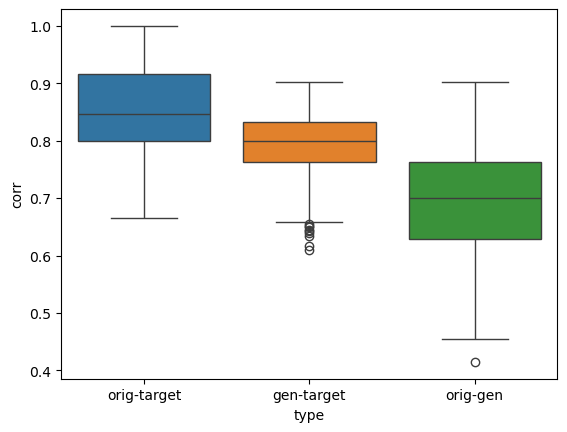

In [10]:
import seaborn as sns 

df_no_same = df.loc[df['corr']!=1.0]

b = sns.boxplot(
    data=df_no_same, 
    x='type', 
    y='corr', 
    hue = 'type')

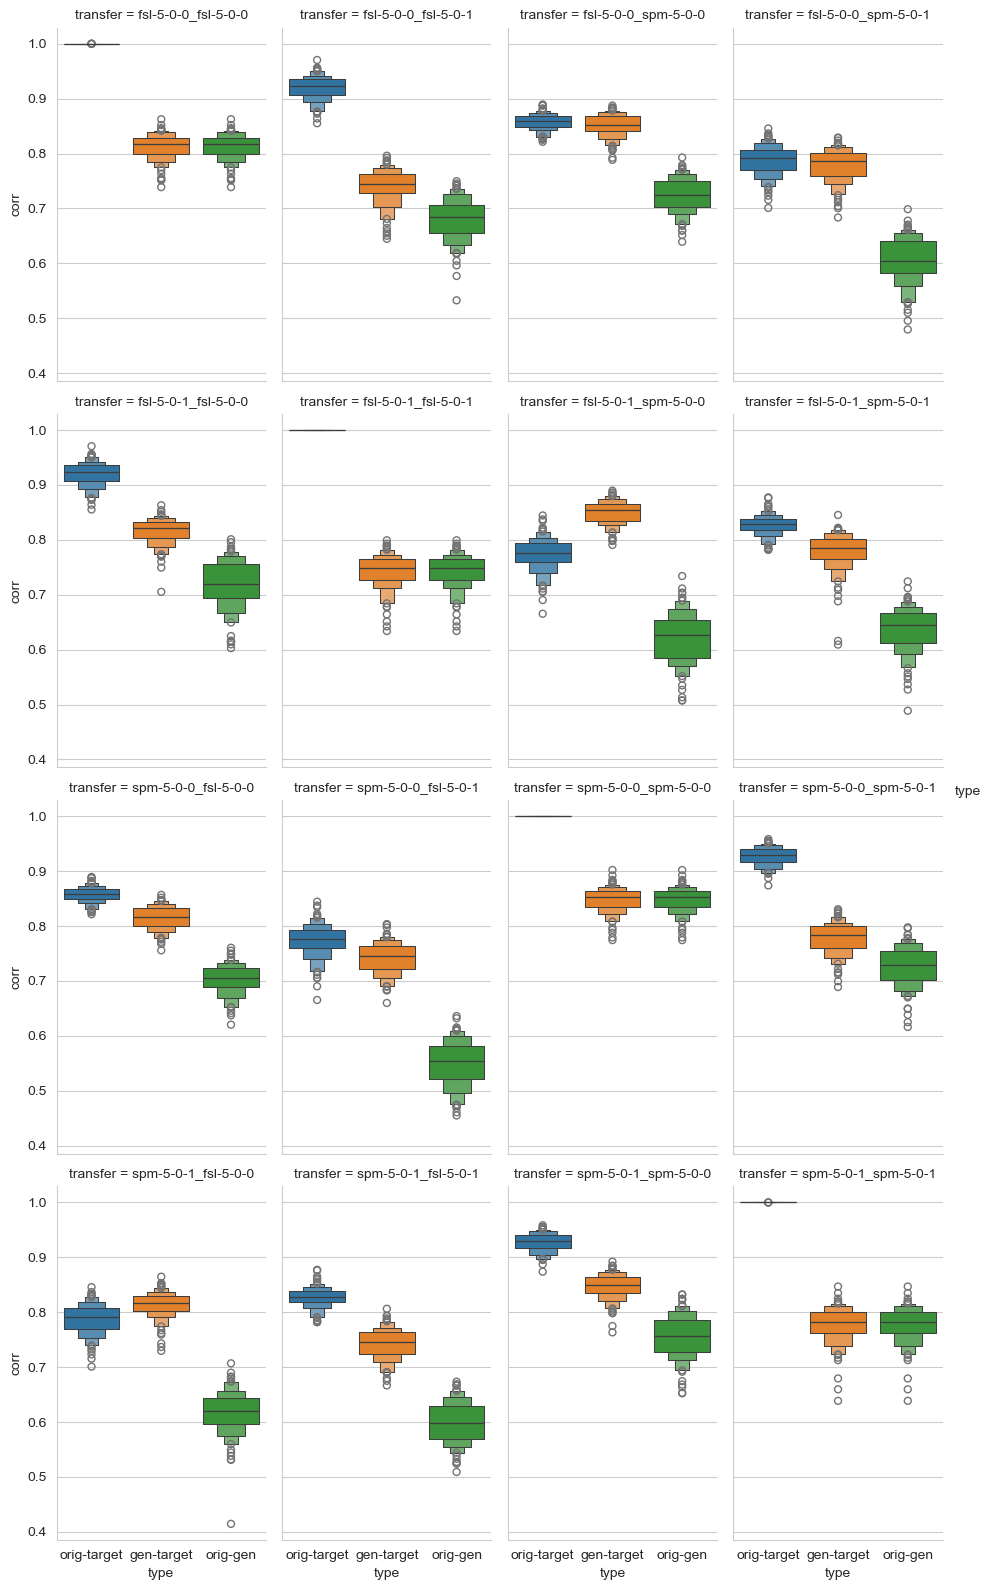

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

#f,ax=plt.subplots(1,1, figsize=(24,6))
b = sns.catplot(data = df, x='type',y='corr', col='transfer', hue='type',
               height=4, aspect=.6, kind = 'boxen', col_wrap=4)
#b.set_xticklabels(b.get_xticklabels(), rotation=45)

## Class change

In [13]:
import numpy as np 

class_change = {}

for t in np.unique(df_metrics['transfer']):
    
    df_transfer = df_metrics.loc[(
        df_metrics['transfer'] == t
    )]

    class_change[t] = 0

    for i in range(len(df_transfer)):
        if df_transfer['gen_pred'].iloc[i] == df_transfer['target_pred'].iloc[i]:
            class_change[t] += 1

    class_change[t] = class_change[t]/len(df_transfer)

In [14]:
class_change

{'fsl-5-0-0_fsl-5-0-0': 1.0,
 'fsl-5-0-0_fsl-5-0-1': 1.0,
 'fsl-5-0-0_spm-5-0-0': 1.0,
 'fsl-5-0-0_spm-5-0-1': 1.0,
 'fsl-5-0-1_fsl-5-0-0': 1.0,
 'fsl-5-0-1_fsl-5-0-1': 1.0,
 'fsl-5-0-1_spm-5-0-0': 1.0,
 'fsl-5-0-1_spm-5-0-1': 1.0,
 'spm-5-0-0_fsl-5-0-0': 1.0,
 'spm-5-0-0_fsl-5-0-1': 1.0,
 'spm-5-0-0_spm-5-0-0': 1.0,
 'spm-5-0-0_spm-5-0-1': 1.0,
 'spm-5-0-1_fsl-5-0-0': 1.0,
 'spm-5-0-1_fsl-5-0-1': 1.0,
 'spm-5-0-1_spm-5-0-0': 0.99,
 'spm-5-0-1_spm-5-0-1': 1.0}

In [15]:
df_metrics

,Unnamed: 0,orig_label,target_label,orig-target,orig-gen,gen-target,w,gen_pred,orig_pred,target_pred,transfer
1,1,tensor(0),tensor(0),1.000000,0.836036,0.836036,1.0,tensor([0]),tensor([0]),tensor([0]),fsl-5-0-0_fsl-5-0-0
3,3,tensor(0),tensor(1),0.901048,0.714444,0.720859,1.0,tensor([1]),tensor([0]),tensor([1]),fsl-5-0-0_fsl-5-0-1
5,5,tensor(0),tensor(2),0.855746,0.779095,0.877794,1.0,tensor([2]),tensor([0]),tensor([2]),fsl-5-0-0_spm-5-0-0
7,7,tensor(0),tensor(3),0.756442,0.662437,0.795420,1.0,tensor([3]),tensor([0]),tensor([3]),fsl-5-0-0_spm-5-0-1
9,9,tensor(1),tensor(0),0.901048,0.672620,0.820998,1.0,tensor([0]),tensor([1]),tensor([0]),fsl-5-0-1_fsl-5-0-0
...,...,...,...,...,...,...,...,...,...,...,...
3191,3191,tensor(2),tensor(3),0.930534,0.737812,0.803989,1.0,tensor([3]),tensor([2]),tensor([3]),spm-5-0-0_spm-5-0-1
3193,3193,tensor(3),tensor(0),0.789114,0.632887,0.825072,1.0,tensor([0]),tensor([3]),tensor([0]),spm-5-0-1_fsl-5-0-0
3195,3195,tensor(3),tensor(1),0.812989,0.597585,0.770976,1.0,tensor([1]),tensor([3]),tensor([1]),spm-5-0-1_fsl-5-0-1
3197,3197,tensor(3),tensor(2),0.930534,0.743229,0.849558,1.0,tensor([2]),tensor([3]),tensor([2]),spm-5-0-1_spm-5-0-0


## Correlation with 0.2 threshold

In [214]:
import nibabel as nib

src = nib.load('/Volumes/egermani/ddpm/samples-4classes/src-image_0-dataset_rh_4class-jeanzay_ep90_w2.0-orig_0-target_1.nii.gz')
gen = nib.load('/Volumes/egermani/ddpm/samples-4classes/gen-image_0-dataset_rh_4class-jeanzay_ep90_w2.0-orig_0-target_1.nii.gz')
trg = nib.load('/Volumes/egermani/ddpm/samples-4classes/trg-image_0-dataset_rh_4class-jeanzay_ep90_w2.0-orig_0-target_1.nii.gz')

In [215]:
def get_correlation(inim, outim):
    '''
    Compute the Pearson's correlation coefficient between original and reconstructed images.
    '''
    #orig, repro = utils.mask_using_original(inim, outim)
    
    data1 = inim.get_fdata().copy()
    data2 = outim.get_fdata().copy()
    
    # Vectorise input data
    data1 = np.reshape(data1, -1)
    data2 = np.reshape(data2, -1)

    in_mask_indices = np.logical_not(
        np.logical_or(
            np.logical_or(np.isnan(data1), np.absolute(data1) < 0.2),
            np.logical_or(np.isnan(data2), np.absolute(data2) < 0.2)))

    data1 = data1[in_mask_indices] 
    data2 = data2[in_mask_indices]
    
    corr_coeff = np.corrcoef(data1, data2)[0][1]
    
    return corr_coeff

In [216]:
print(get_correlation(src, trg))
print(get_correlation(src, gen))
print(get_correlation(gen, trg))

0.9434329295710271
0.9530540577395672
0.9753767982522256


In [27]:
import torch
import random

c = torch.tensor([[0,1,0,0], [0,0,1,0]])

c_bis = torch.zeros_like(c)
c_bis_val = random.sample(range(c_bis.shape[1]),c_bis.shape[0])

for i in range(c_bis.shape[0]):
    c_bis[i, c_bis_val[i]] = 1

In [33]:
c_bis.repeat(2,1)

tensor([[1, 0, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 0, 0, 1]])

In [32]:
c_bis

tensor([[1, 0, 0, 0],
        [0, 0, 0, 1]])